# Dynamic heuristic analysis

This notebook is used to analyze logs produced with `experimental` flag by dynamic heuristic.

Expected format is comma-separated list of:
- metaheuristic name
- generation
- duration (ms)
- search state. Possible values are in `[diverse, best_major, best_minor, diverse, stagnated]`


In [157]:
import pandas as pd
import matplotlib.pyplot as plt

#%matplotlib inline
#plt.rcParams["figure.figsize"] = (28, 14)

pd.set_option("display.max.columns", None)


data = pd.read_csv ('../data/heuristics/example.csv')

# All by search state

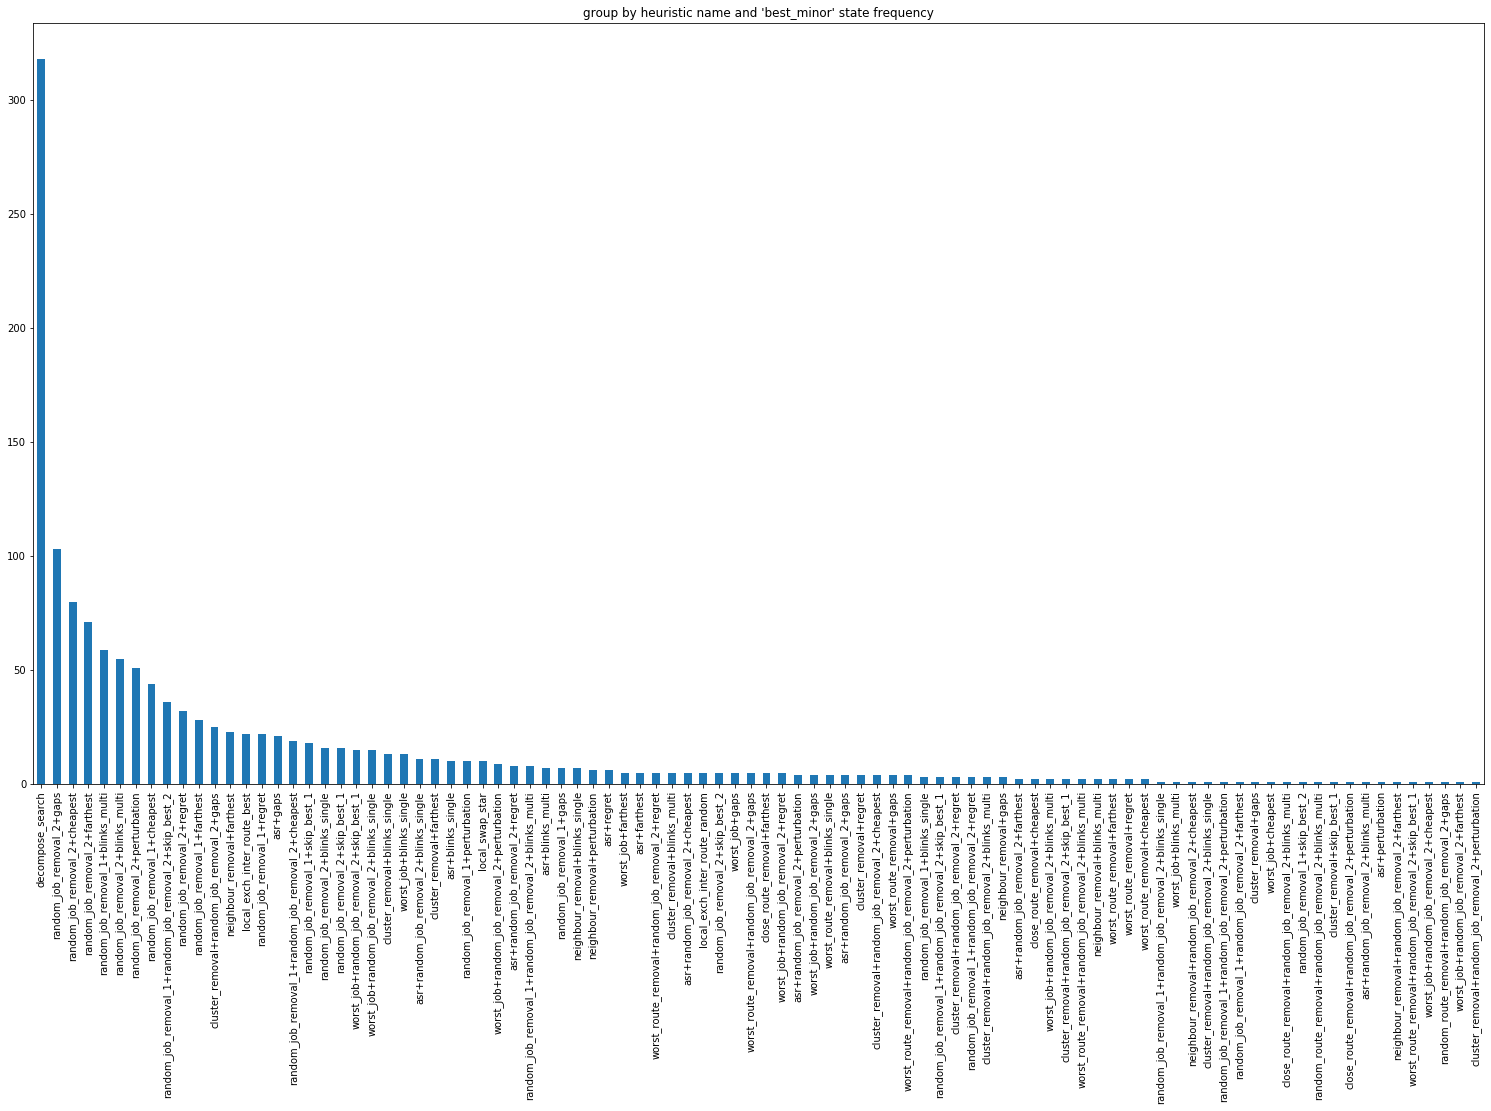

In [158]:
def create_bins(column, steps):
    max = column.max()
    divider = round(max / steps)
    return [x for x in range (max) if x % divider == 0]

search_state = 'best_minor'

df = data[data.state == search_state]
df['name'].value_counts().plot.bar(title = "group by heuristic name and '{}' state frequency".format(search_state), figsize = (26, 14))

# By specific heuristic name

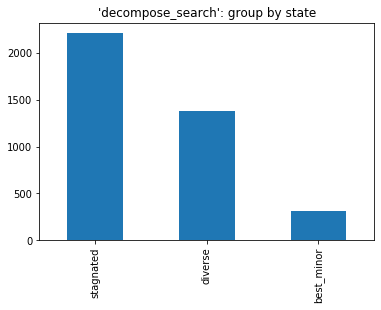

In [159]:
heuristic_name = 'decompose_search'

df = data[data.name == heuristic_name]
df['state'].value_counts().plot.bar(title="'{}': group by state".format(heuristic_name))

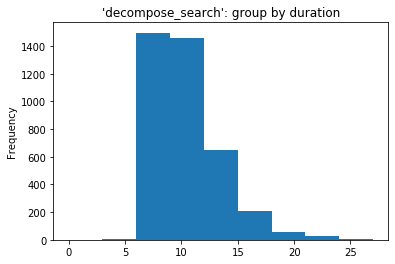

In [160]:
bins = create_bins(df['duration'], 10)
df['duration'].plot.hist(bins=bins, title = "'{}': group by duration".format(heuristic_name))

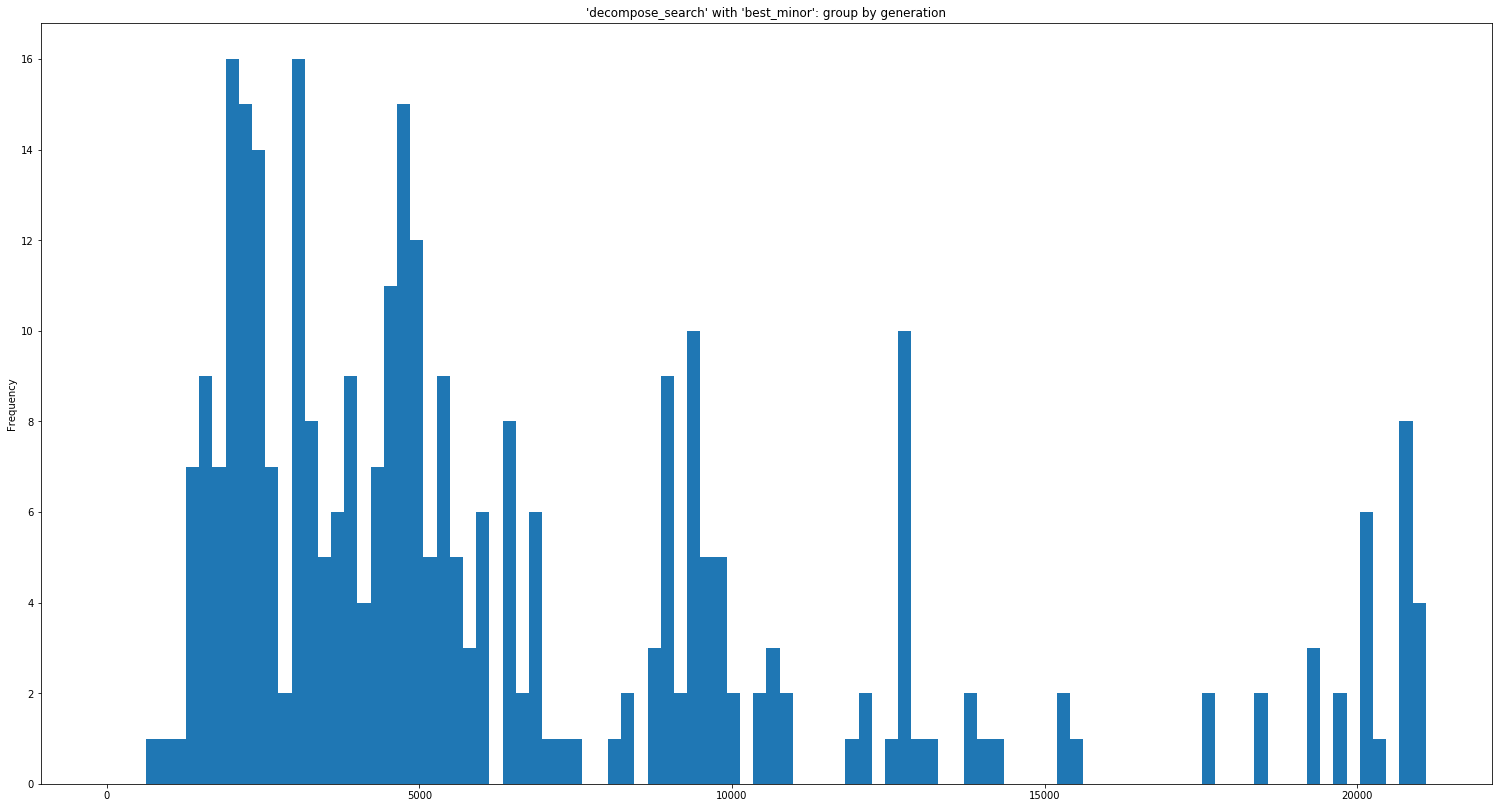

In [161]:
df = data[data.name == heuristic_name]
df = df[df.state == search_state]

bins = create_bins(df['generation'], 100)
df['generation'].plot.hist(bins=bins, figsize = (26, 14),
 title = "'{}' with '{}': group by generation".format(heuristic_name, search_state)
)